In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# COVID-19 and Public Pension Risk in US

### Data
The data used for this report is from the new Public Plans Database (PPD) constructed by the Center for Retirement Research at Boston College, the U.S. Census Bureau, the NCSL, and the Current Population Survey (CPS).
### Question to answer
How did pandemic and financial crisis affect the U.S. public pension plans, and what if the pandemic scale differs?

How did COVID-19 affect the funding position of U.S. public pension plans, and which states exhibit persistent structural pension risk despite market recovery?

In [2]:
pension_df = pd.read_csv("pension_data.csv", encoding="cp1252")
pension_df = pension_df[pension_df["fy"] > 2016]

/var/folders/tr/w9p9c_hx39j1vrtknn93nc0c0000gn/T/ipykernel_642/1256882160.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  pension_df = pd.read_csv("pension_data.csv", encoding="cp1252")


In [ ]:
pd.set_option('display.max_columns', None)
print(pension_df.columns)

Index(['ppd_id', 'PlanName', 'fy', 'system_id', 'PlanFullName',
       'source_PlanBasics', 'FiscalYearType', 'PlanInceptionYear',
       'PlanClosed', 'PlanYearClosed',
       ...
       'CashTotal_Rtrn', 'CashTotal_Actl', 'CashTotal_Trgt', 'OtherTotal_Rtrn',
       'OtherTotal_Actl', 'OtherTotal_Trgt', 'Duration_Type',
       'Duration_describe', 'Total_Duration', 'Total_MktVal_Duration'],
      dtype='object', length=272)


In [40]:
pension_df.describe()

,ppd_id,fy,system_id,FiscalYearType,PlanInceptionYear,PlanClosed,PlanYearClosed,AdministeringGovt,PlanType,SocSecCovered,EmployerType,CostSharing,EEGroupID,TierID,ActCostMeth_GASB,FundingMeth_GASB,InflationAssumption_GASB,InvestmentReturnAssumption_GASB,ActCostMethCode_GASB,AssetValMethCode_GASB,AssetSmoothingPeriod_GASB,FundingMethCode1_GASB,FundingMethCode2_GASB,UAALAmortPeriod_GASB,BlendedDiscountRate,PhaseIn,ActCostMeth,ActCostMeth_note,FundingMeth,FundingMeth_note,MktAssets_Smooth,ActAssets_Smooth,NetFlows_smooth,AssetValMethCode,SmoothingReset,GainlossConcept,GainLossBase_1,GainLossBase_2,GainLoss,GainLossPeriod,PhaseInPercent,PhaseInPeriods,PhaseInType,GainLossRecognition,AssetSmoothingBaseline,ExpectedReturnMethod,AddSubtractGainLoss,UpperCorridor,LowerCorridor,ActCostMethCode,FundMethCode_1,FundMethCode_2,PayrollGrowthAssumption,TotAmortPeriod,RemainingAmortPeriod,UAALYearEstablished,WageInflation,ActAssets_GASB,ActLiabilities_GASB,ActFundedRatio_GASB,UAAL_GASB,ActLiabilities_other,payroll,RequiredContribution,PercentReqContPaid,TotalPensionLiability,NetPosition,NetPensionLiability,ActAssets_est,ActLiabilities_est,ActFundedRatio_est,RequiredContribution_est,ActFundedRatio_GASB67,InvestmentConsultantCode,InvestmentReturn_1yr,InvestmentReturn_2yr,InvestmentReturn_3yr,InvestmentReturn_4yr,InvestmentReturn_5yr,InvestmentReturn_7yr,InvestmentReturn_8yr,InvestmentReturn_10yr,InvestmentReturn_12yr,InvestmentReturn_15yr,InvestmentReturn_20yr,InvestmentReturn_25yr,InvestmentReturn_30yr,InvestmentReturn_LongTerm,InvestmentReturn_LTStartYear,GrossReturns,GeoReturn_est,GeoGrowth_est,InvestmentReturn_1yr_est,InvestmentReturn_5yr_est,InvestmentReturn_10yr_est,AvgReturn_3yr,AvgReturn_5yr,AvgReturn_10yr,expense_SecLendMgmtFees,contrib_EE_regular,contrib_ER_regular,contrib_ER_state,contrib_EE_PurchaseService,contrib_EE_other,contrib_ER_other,contrib_other,POB_Flag,POB_Amount,contrib_tot,FairValueChange_investments,FairValueChange_RealEstate,income_interest,income_dividends,income_InterestAndDividends,income_RealEstate,income_PrivateEquity,income_alternatives,income_international,income_OtherInvestments,expense_RealEstate,expense_PrivateEquity,expense_alternatives,expense_OtherInvestments,expense_investments,FVChange_SecLend,income_SecuritiesLending,expense_SecuritiesLending,income_SecuritiesLendingRebate,FVChange_SecLend_UG,income_OtherAdditions,income_net,expense_TotBenefits,expense_RetBenefits,expense_DisabilityBenefits,expense_DeathBenefits,expense_DROPBenefits,expense_SurvivorBenefits,expense_COLABenefits,expense_LumpSumBenefits,expense_OtherBenefits,expense_refunds,expense_AdminExpenses,expense_Depreciation,expense_OtherDeductions,expense_net,adjustment_MktAssets,MktAssets_net,BegMktAssets_net,contrib_ER_tot,contrib_other_tot,FairValueChange_tot,income_interest_dividends_tot,expense_investments_tot,SecLend_tot,investments_net,expense_other_tot,ContributionFY,ActuarialFirmCode,NormCostRate_tot,NormCostRate_EE,NormCostRate_ER,ReqContRate_ER,ReqContRate_tot,ReqContRate_ER_Stat,ReqContRate_tot_Stat,NormCostAmount_tot,NormCostAmount_EE,NormCostAmount_ER,ReqContAmount_ER,ReqContAmount_tot,ReqContAmount_ER_Stat,ReqContAmount_tot_Stat,NormCostRate_tot_est,NormCostRate_EE_est,NormCostRate_ER_est,ReqContRate_ER_est,ProjectedPayroll,UAALRate,beneficiaries_DisabilityRetirees,beneficiaries_DependentSurvivors,actives_tot,ActiveSalaries,ActiveAge_avg,ActiveTenure_avg,ActiveSalary_avg,InactiveVestedMembers,InactiveNonVested,beneficiaries_tot,benefits_tot,BeneficiaryAge_avg,BeneficiaryBenefit_avg,beneficiaries_ServiceRetirees,benefits_ServiceRetirees,ServiceRetireeAge_avg,ServiceRetireeBenefit_avg,ServiceRetAge_avg,ServiceRetTenure_avg,benefits_DisabilityRetirees,beneficiaries_survivors,beneficiaries_SpousalSurvivors,beneficiaries_other,DROPMembers,OtherMembers,TotMembership,ActiveSalary_avg_est,BeneficiaryBenefit_avg_est,PVFB_InactiveNonVested,PVFB_active,PVFB_InactiveVested,PVFB_retiree,PVFB_other,PVFB_tot,PVFNC_tot,PVFC_EE,PVFNC_ER,PVFS,Accrue

In [5]:
pension_df.describe(include="object")

,PlanName,PlanFullName,source_PlanBasics,StateAbbrev,StateName,GovtName,EmployeeTypeCovered,SocSecCovered_verbatim,CostStructure,BenefitsWebsite,ActRptDate,fye,AssetValMeth_GASB,AssetValMeth,AssetValMeth_note,InvestmentConsultantName,ActuarialFirm,Duration_describe
count,2016,2016,296,2016,2016,2016,2016,2016,2016,1696,1885,1919,0,24,32,1439,1851,81
unique,252,251,30,51,51,117,5,5,6,192,90,50,0,5,13,49,54,5
top,Alabama ERS,Montgomery County (MD) Employees' Retirement S...,2012 CAFR p 7,CA,California,Washington,Plan covers local employees,Plan members covered by Social Security,"Multiple employer, cost sharing plan",https://www.copera.org/members/built-in-benefits,2022-06-30,2017-06-30,NaN,Smoothed,Gain and losses are recognized over various le...,NEPC,GRS,Effective
freq,8,16,24,128,128,64,632,1520,1048,32,111,161,NaN,12,8,201,486,59


One of the core concepts in retirement actuarial work is the funded ratio. It reflects "a pension fund’s current financial position" (DeNederlandscheBank).\
In general, $\text{Funded ratio} = \frac{\text{Actuarial Value of Assets}}{\text{Actuarial Value of Liability}}$.

In [6]:
pension_df.groupby("StateAbbrev")["ActFundedRatio_GASB"].mean().sort_values()

StateAbbrev
IL    0.447386
KY    0.507573
NJ    0.549085
RI    0.550713
HI    0.581549
MS    0.598506
CT    0.624486
NH    0.630523
MA    0.631831
AL    0.632980
FL    0.647988
NM    0.666581
AZ    0.667390
PA    0.679505
VT    0.686045
LA    0.686288
CO    0.690594
MI    0.699170
SC    0.702139
AK    0.741982
MT    0.744219
TX    0.748371
AR    0.753025
OH    0.754621
NV    0.755027
WV    0.760030
OR    0.762114
GA    0.767971
ND    0.768220
MO    0.774852
WY    0.775779
IN    0.788826
MD    0.792500
NE    0.799456
CA    0.805079
MN    0.814675
VA    0.832474
KS    0.840929
TN    0.841468
WI    0.850158
NC    0.852943
NY    0.853098
IA    0.858593
DE    0.879009
ID    0.888489
OK    0.894986
UT    0.909066
ME    0.927124
WA    0.937965
DC    1.028377
SD    1.039763
Name: ActFundedRatio_GASB, dtype: float64

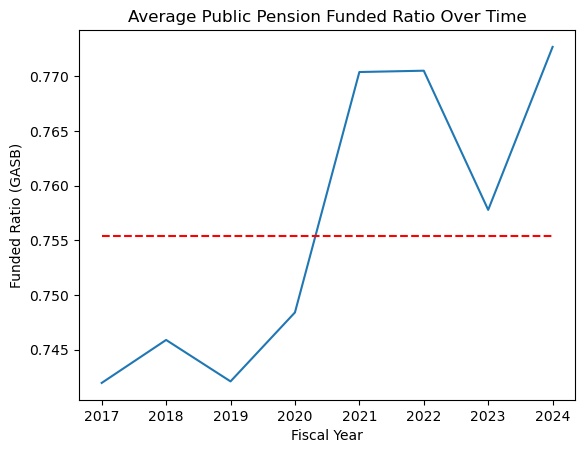

In [36]:
avg_by_year = (
    pension_df
    .groupby("fy")["ActFundedRatio_GASB"]
    .median()
    .sort_index()
)

plt.plot(avg_by_year.index, avg_by_year.values)
plt.hlines(y=pension_df["ActFundedRatio_GASB"].median(), xmin=avg_by_year.index.min(), xmax=avg_by_year.index.max(), colors='r', linestyles='dashed')
plt.xlabel("Fiscal Year")
plt.ylabel("Funded Ratio (GASB)")
plt.title("Average Public Pension Funded Ratio Over Time")
plt.show()


As shown in the plot, the funded ratio of Illinois pension plans remained depressed from 2017 through 2020 and increased sharply beginning in 2021 during the post-COVID recovery period. The median funded ratio reached its minimum in 2019, which is exactly the start of the pandemic.

Therefore, we will take a closer look at 2019 to see how the funded ratio vary across states.

In [37]:
df_2019 = pension_df[pension_df["fy"] == 2019]
state_funded = pd.DataFrame(
    df_2019.groupby(["StateName", "StateAbbrev"], as_index=False)["ActFundedRatio_GASB67"].median()
)


In [16]:
us_states = gpd.read_file(
    "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
)

us_states["name"] = us_states["name"].str.upper()
state_funded["StateName"] = state_funded["StateName"].str.upper()

map_df = us_states.merge(
    state_funded,
    left_on="name",
    right_on="StateName",
    how="left"
)
map_df["label_point"] = map_df.geometry.representative_point()


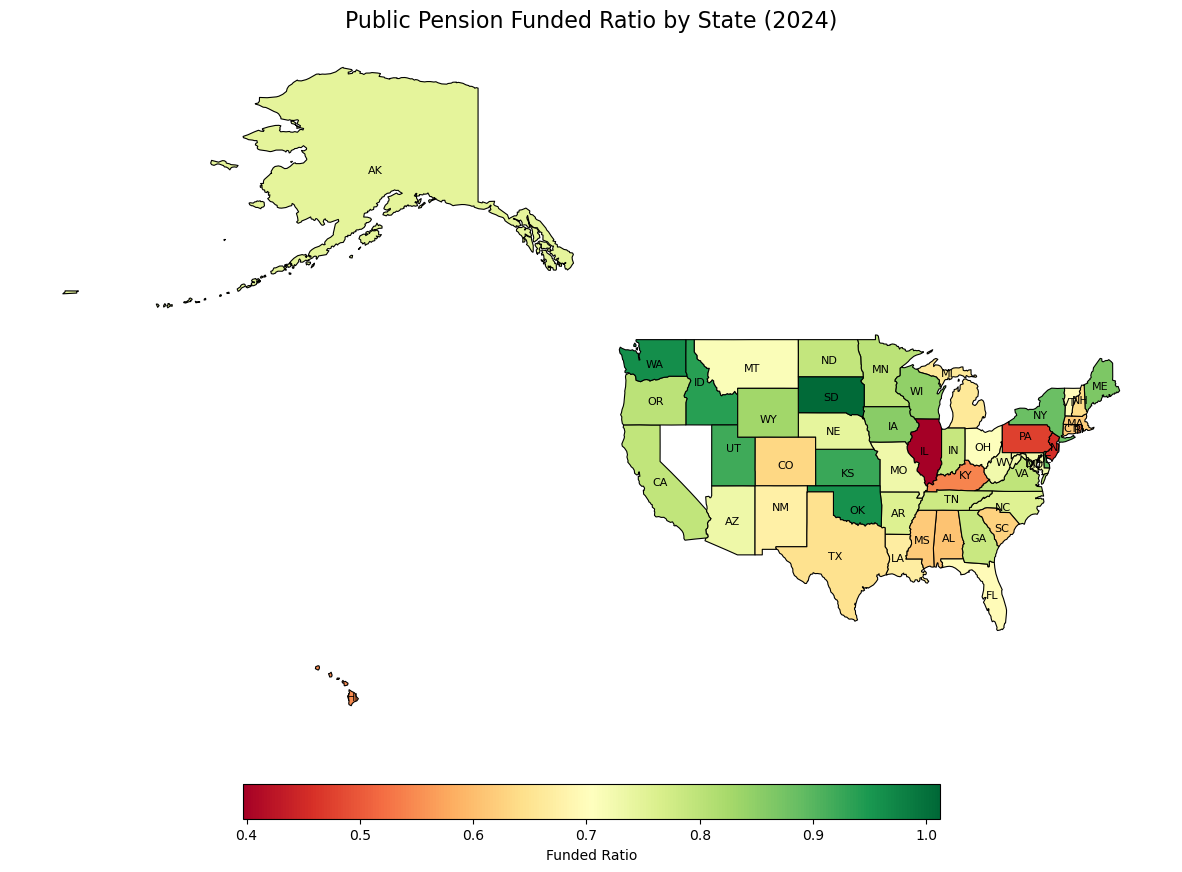

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

map_df.plot(
    column="ActFundedRatio_GASB67",
    cmap="RdYlGn",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Funded Ratio",
        "orientation": "horizontal",
        "shrink": 0.6,
        "pad": 0.04
    }
)

for _, row in map_df.iterrows():
    if row["ActFundedRatio_GASB67"] == row["ActFundedRatio_GASB67"]:
        label = row["StateAbbrev"] if row["StateAbbrev"] == row["StateAbbrev"] else row["StateName"]
        ax.text(
            row["label_point"].x,
            row["label_point"].y,
            label,
            fontsize=8,
            ha="center",
            va="center"
        )

ax.set_title("Public Pension Funded Ratio by State (2024)", fontsize=16)
ax.axis("off")
plt.show()


From the plot above, we observe that Illinois has a significantly lower median funded ratio from other states.  We will investigate whether Illinois always has a lower funded ratio.

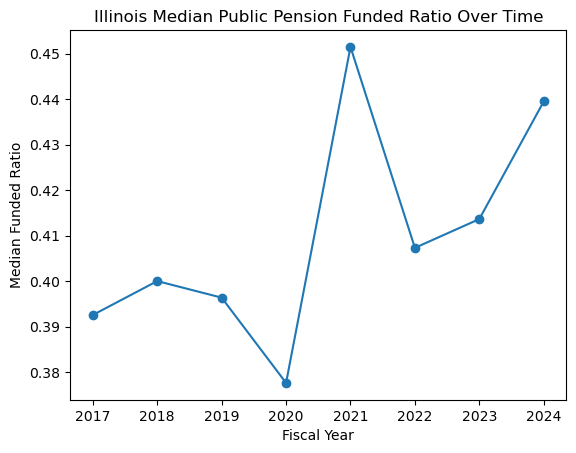

In [34]:
il_pension_df = pension_df[pension_df["StateAbbrev"] == "IL"]

il_median_by_year = (
    il_pension_df
    .groupby("fy")["ActFundedRatio_GASB67"]
    .median()
    .sort_index()
)

plt.plot(
    il_median_by_year.index,
    il_median_by_year.values,
    marker="o"
)

plt.xlabel("Fiscal Year")
plt.ylabel("Median Funded Ratio")
plt.title("Illinois Median Public Pension Funded Ratio Over Time")
plt.show()


From the plot above, we observe that Illinois consistently exhibits one of the lowest public pension funded ratios in the United States. While the COVID-19 market shock temporarily worsened funding levels, the data indicate that Illinois’s pension stress is structural rather than cyclical. We then investigate the reasons behind this phenomenon.

Unfunded Actuarial Accrued Liability is a key value to check if the benefit cost exceed funds. We will then check this value across all states in the US.

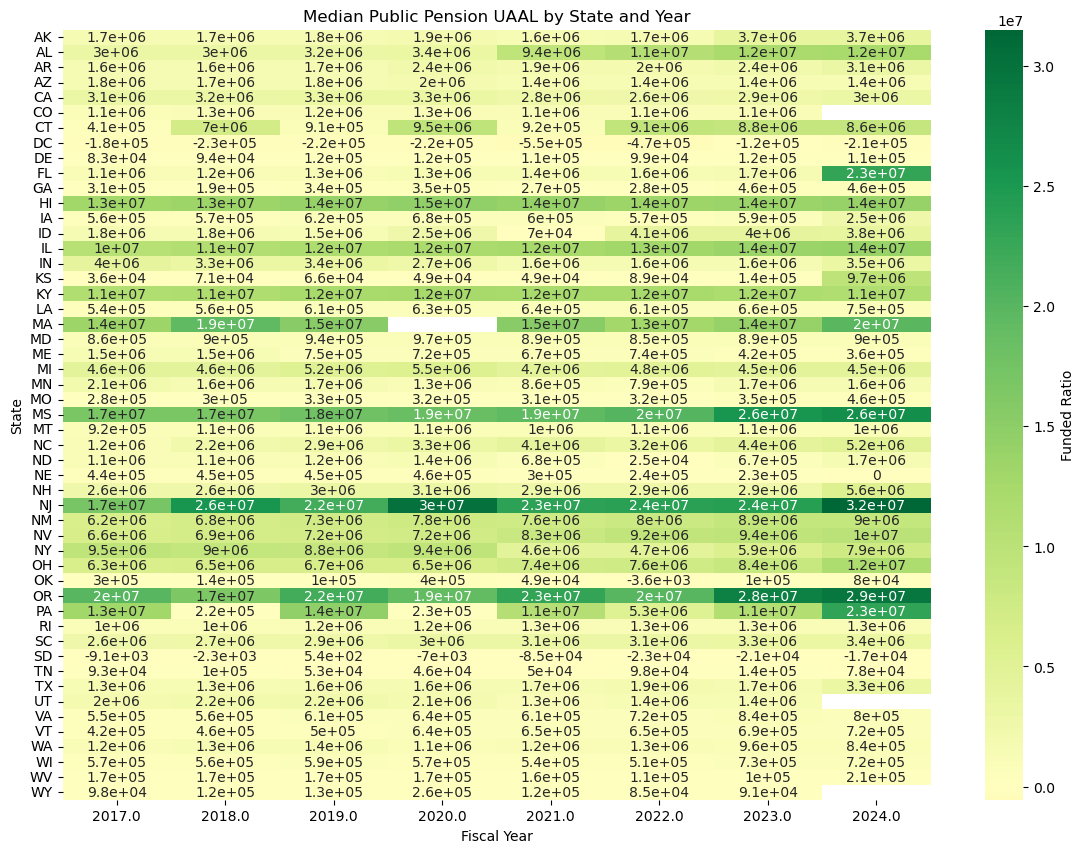

In [ ]:
heat_df = (
    pension_df
    .groupby(["StateAbbrev", "fy"])["UAAL_GASB"]
    .median()
    .reset_index()
)

pivot = heat_df.pivot(
    index="StateAbbrev",
    columns="fy",
    values="UAAL_GASB"
)
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot,
    cmap="RdYlGn",
    center=1.0,
    annot=True,
    cbar_kws={"label": "Funded Ratio"}
)
plt.title("Median Public Pension UAAL by State and Year")
plt.xlabel("Fiscal Year")
plt.ylabel("State")
plt.show()



By checking the UAAL with the heat map above, we can say that for each state, the UAAL does not vary a lot. And Illinois performs better than many other states. It may due to the `median()` we used here, as it ignores the largest benefit cost in every state. Therefore, we will calculate the liability-weighted funded ratio instead.

In [43]:
state_weighted = (
    df_2019
    .groupby(["StateAbbrev", "StateName"])
    .apply(
        lambda x: (
            x["ActAssets_GASB"].sum()
            / x["ActLiabilities_GASB"].sum()
        )
    )
    .reset_index(name="WeightedFundedRatio")
)
state_weighted

/var/folders/tr/w9p9c_hx39j1vrtknn93nc0c0000gn/T/ipykernel_642/1435920655.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,StateAbbrev,StateName,WeightedFundedRatio
0,AK,Alaska,0.676998
1,AL,Alabama,0.689799
2,AR,Arkansas,0.787827
3,AZ,Arizona,0.645558
4,CA,California,0.719650
5,CO,Colorado,0.617841
6,CT,Connecticut,0.230470
7,DC,District of Columbia,1.054566
8,DE,Delaware,0.849188
9,FL,Florida,0.827871


In [ ]:
state_weighted["StateName"] = state_weighted["StateName"].str.upper().str.strip()

map_df = us_states.merge(
    state_weighted,
    left_on="name",
    right_on="StateName",
    how="left"
)

map_df["label_point"] = map_df.geometry.representative_point()


,id,name,density,geometry,StateAbbrev,StateName,WeightedFundedRatio,label_point
0,01,ALABAMA,94.650,"POLYGON ((-87.359 35.001, -85.607 34.985, -85....",AL,ALABAMA,0.689799,POINT (-86.749 32.72)
1,02,ALASKA,1.264,"MULTIPOLYGON (((-131.6 55.118, -131.57 55.282,...",AK,ALASKA,0.676998,POINT (-152.89 62.923)
2,04,ARIZONA,57.050,"POLYGON ((-109.04 37, -109.05 31.332, -111.07 ...",AZ,ARIZONA,0.645558,POINT (-111.69 34.141)
3,05,ARKANSAS,56.430,"POLYGON ((-94.474 36.502, -90.153 36.496, -90....",AR,ARKANSAS,0.787827,POINT (-92.448 34.747)
4,06,CALIFORNIA,241.700,"POLYGON ((-123.23 42.006, -122.38 42.012, -121...",CA,CALIFORNIA,0.719650,POINT (-120.01 37.301)
5,08,COLORADO,49.330,"POLYGON ((-107.92 41.004, -105.73 40.998, -104...",CO,COLORADO,0.617841,POINT (-105.55 38.701)
6,09,CONNECTICUT,739.100,"POLYGON ((-73.054 42.039, -71.799 42.023, -71....",CT,CONNECTICUT,0.230470,POINT (-72.658 41.71)
7,10,DELAWARE,464.300,"POLYGON ((-75.414 39.804, -75.507 39.684, -75....",DE,DELAWARE,0.849188,POINT (-75.585 39.188)
8,11,DISTRICT OF COLUMBIA,10065.000,"POLYGON ((-77.035 38.994, -76.909 38.895, -77....",DC,DISTRICT OF COLUMBIA,1.054566,POINT (-77.022 38.843)
9,12,FLORIDA,353.400,"POLYGON ((-85.497 30.998, -85.004 31.003, -84....",FL,FLORIDA,0.827871,POINT (-81.666 27.991)


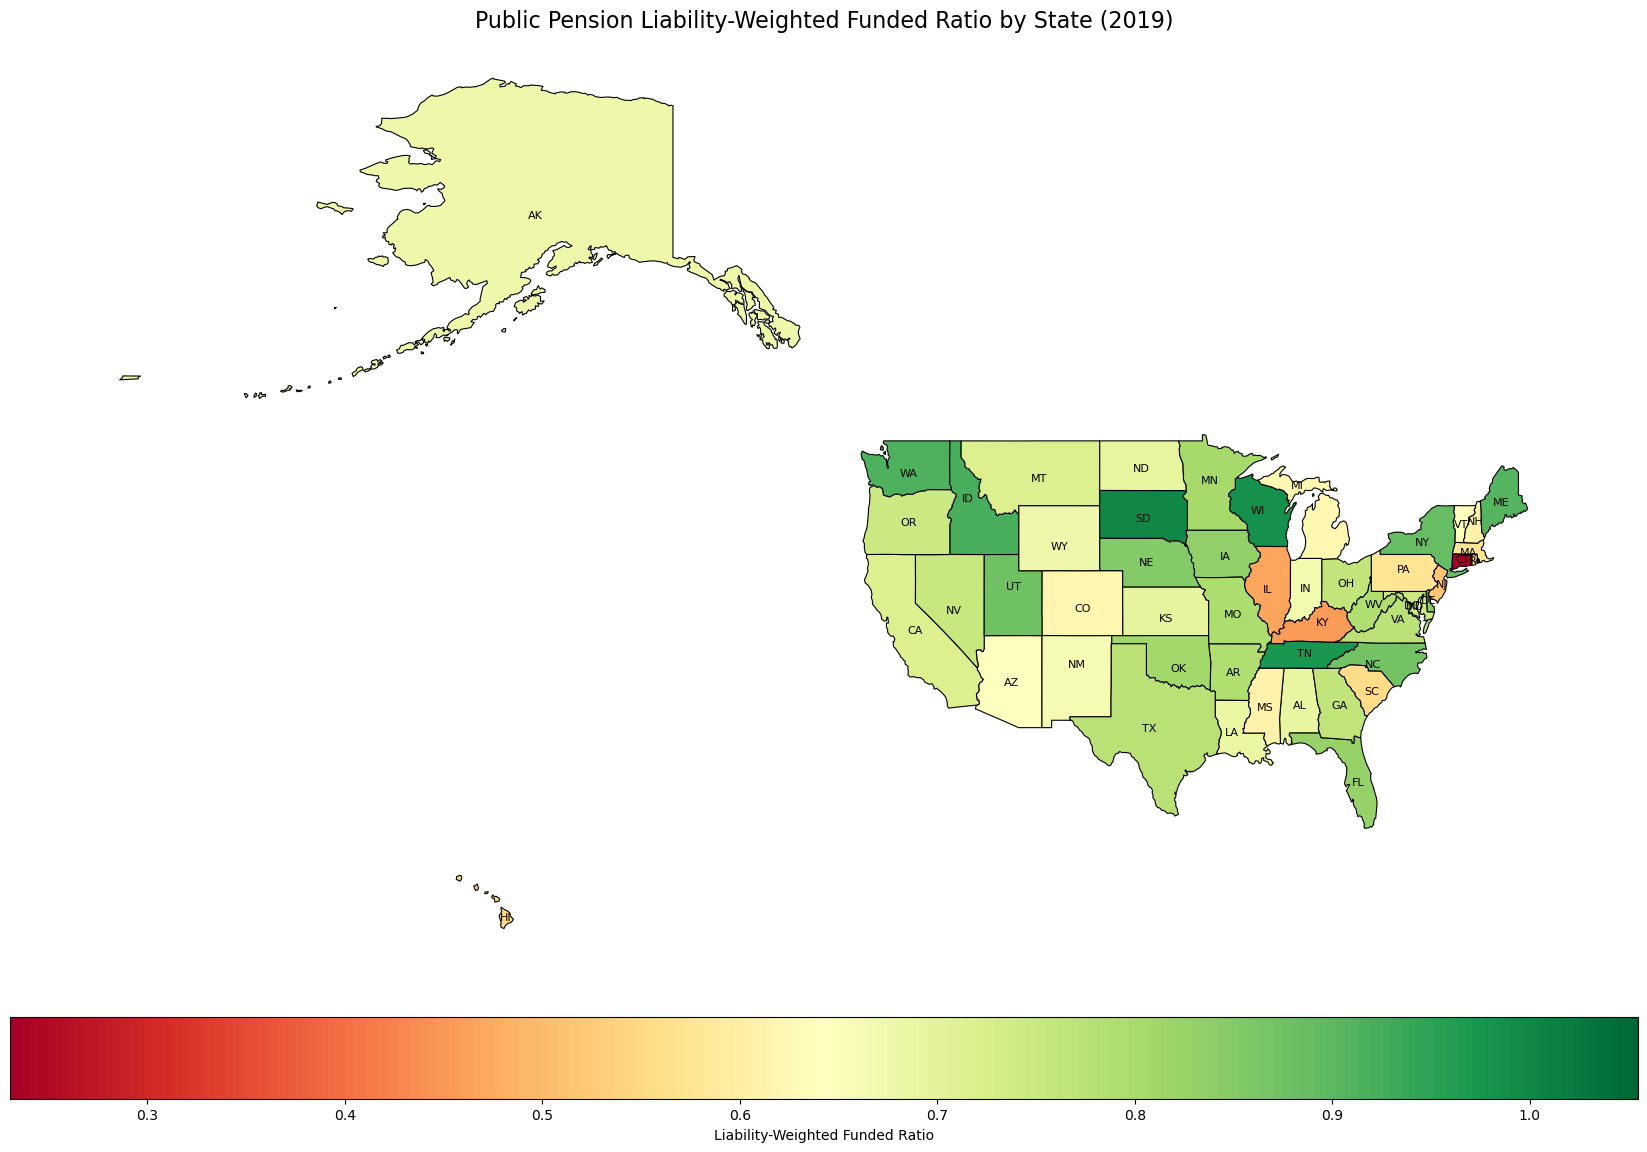

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(35, 15))

map_df.plot(
    column="WeightedFundedRatio",
    cmap="RdYlGn",    
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
    legend_kwds={
    "label": "Liability-Weighted Funded Ratio",
    "orientation": "horizontal",
    "shrink": 0.6,
    "pad": 0.04
}
)

for _, row in map_df.iterrows():
    if row["WeightedFundedRatio"] == row["WeightedFundedRatio"]:
        label = row["StateAbbrev"]
        ax.text(
            row["label_point"].x,
            row["label_point"].y,
            label,
            fontsize=8,
            ha="center",
            va="center"
        )

ax.set_title("Public Pension Liability-Weighted Funded Ratio by State (2019)", fontsize=16)
ax.axis("off")
plt.show()


In [41]:
g = (df_2019.groupby(["StateAbbrev","StateName"])
     .agg(
         assets_sum=("ActAssets_GASB","sum"),
         liab_sum=("ActLiabilities_GASB","sum"),
         n_plans=("ppd_id","count"),
         n_assets=("ActAssets_GASB", lambda s: s.notna().sum()),
         n_liab=("ActLiabilities_GASB", lambda s: s.notna().sum()),
     )
     .reset_index()
)

In [42]:
g

,StateAbbrev,StateName,assets_sum,liab_sum,n_plans,n_assets,n_liab
0,AK,Alaska,1.547889e+07,2.286400e+07,3,3,3
1,AL,Alabama,3.956692e+07,5.736008e+07,4,4,4
2,AR,Arkansas,2.859486e+07,3.629587e+07,4,4,4
3,AZ,Arizona,5.254147e+07,8.138919e+07,5,5,5
4,CA,California,8.573546e+08,1.191349e+09,16,16,16
5,CO,Colorado,5.065092e+07,8.198044e+07,6,6,6
6,CT,Connecticut,1.773203e+07,7.693846e+07,4,3,4
7,DC,District of Columbia,8.540788e+06,8.098864e+06,2,2,2
8,DE,Delaware,1.010756e+07,1.190261e+07,4,4,4
9,FL,Florida,1.668647e+08,2.015588e+08,5,5,5
